# TDS Project: Dataset Selection, EDA, and Basic Model Analysis

**Group Members:**
- Adir Elmakais - 316413640

**Date:** November 17, 2024

## Introduction

This project aims to analyze the "Student Performance Factors" dataset to understand the various factors influencing students' exam scores. We will perform exploratory data analysis (EDA), build a baseline regression model using XGBoost, and conduct an error analysis to identify areas for improvement.


## 1. Dataset Selection

### Dataset Overview

We have selected the **"Student Performance Factors"** dataset from [Kaggle](https://www.kaggle.com/datasets/your-dataset-link). This dataset provides comprehensive insights into various factors affecting student performance in exams, including study habits, attendance, parental involvement, and more.

### Dataset Details

- **Number of Records:** 6,607
- **Number of Features:** 20
- **Attribute Types:**
  - **Numeric:** Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Family_Income, Distance_from_Home, Physical_Activity, etc.
  - **Categorical:** Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Gender, etc.

### Reference

> **Dataset Reference:** "Student Performance Factors," available on [Kaggle](https://www.kaggle.com/datasets/your-dataset-link), accessed on November 17, 2024.


## 2. Data Analysis

### a. Data Loading and Inspection

First, we load the dataset and perform initial inspections to understand its structure and contents.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot styles
sns.set_theme(style="whitegrid")
%matplotlib inline

# Loading the dataset
data = pd.read_csv('data/StudentPerformanceFactors.csv')

# Displaying the first few rows
data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### b. Data Cleaning

Before diving into analysis, it's essential to check for missing values and handle them appropriately.


In [2]:
# Checking for missing values
data.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Upon inspecting the dataset, we identified missing values in the following categorical columns:

- **Teacher_Quality:** 78 missing values
- **Parental_Education_Level:** 90 missing values
- **Distance_from_Home:** 67 missing values

To maintain data integrity without introducing potential biases from imputation, we will **remove all rows** containing missing values in these columns.


In [3]:
# Displaying the number of missing values before cleaning
print("Missing Values Before Cleaning:")
print(data.isnull().sum())

# Dropping rows with missing values in specified columns
columns_with_missing = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
data_cleaned = data.dropna(subset=columns_with_missing)

# Displaying the number of missing values after cleaning
print("\nMissing Values After Cleaning:")
print(data_cleaned.isnull().sum())

# Displaying the change in dataset size
print(f"\nOriginal dataset size: {data.shape[0]} rows")
print(f"Cleaned dataset size: {data_cleaned.shape[0]} rows")
print(f"Rows removed: {data.shape[0] - data_cleaned.shape[0]}")


Missing Values Before Cleaning:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Missing Values After Cleaning:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Interne

### Exploratory Data Analysis (EDA)
### a. Data Loading and Inspection
We begin by loading the cleaned dataset and performing initial inspections to understand its structure and contents.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot styles
sns.set_theme(style="whitegrid")
%matplotlib inline

# Loading the cleaned dataset
data_cleaned = data_cleaned.copy()  # Ensuring we're working with the cleaned data

# Displaying the first few rows
data_cleaned.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### b. Data Summary

Let's explore the basic statistics and data types to gain an overview of the dataset.


In [5]:
# Displaying dataset information
data_cleaned.info()
data_cleaned.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


**Findings:**

- **Numerical Features:** Several attributes like `Hours_Studied`, `Attendance`, `Sleep_Hours`, `Previous_Scores`, etc., are numerical and suitable for quantitative analysis.
- **Categorical Features:** Attributes such as `Parental_Involvement`, `Access_to_Resources`, `Extracurricular_Activities`, etc., are categorical and may require encoding for modeling.
- **No Missing Values:** All missing values have been addressed, ensuring the dataset is complete.


### c. Visualizations

We'll create the following five visualizations:

1. Distribution of Exam_Score
2. Correlation Heatmap
3. Box Plot: Parental_Involvement vs. Exam_Score
4. Scatter Plot: Hours_Studied vs. Exam_Score
5. Pair Plot of Selected Features and Exam_Score

#### 1. Distribution of Exam_Score

Understanding the distribution of the target variable `Exam_Score` is essential to identify its central tendency, spread, and potential skewness.


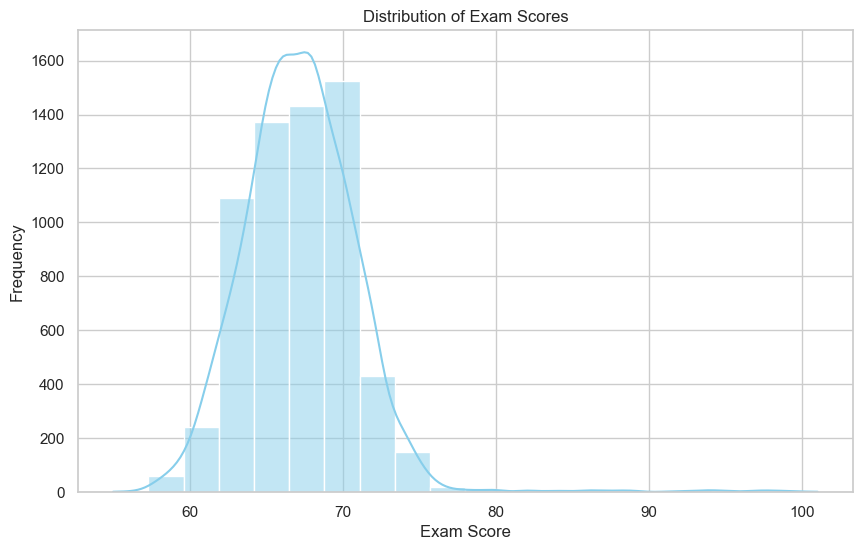

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Exam_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


**Explanation:**

The histogram illustrates the frequency distribution of `Exam_Score`. The KDE (Kernel Density Estimate) overlay helps in visualizing the underlying distribution shape, indicating whether the scores are normally distributed, skewed, or exhibit any multi-modality.


#### 2. Correlation Heatmap

A correlation heatmap helps identify the strength and direction of relationships between `Exam_Score` and other numerical features.


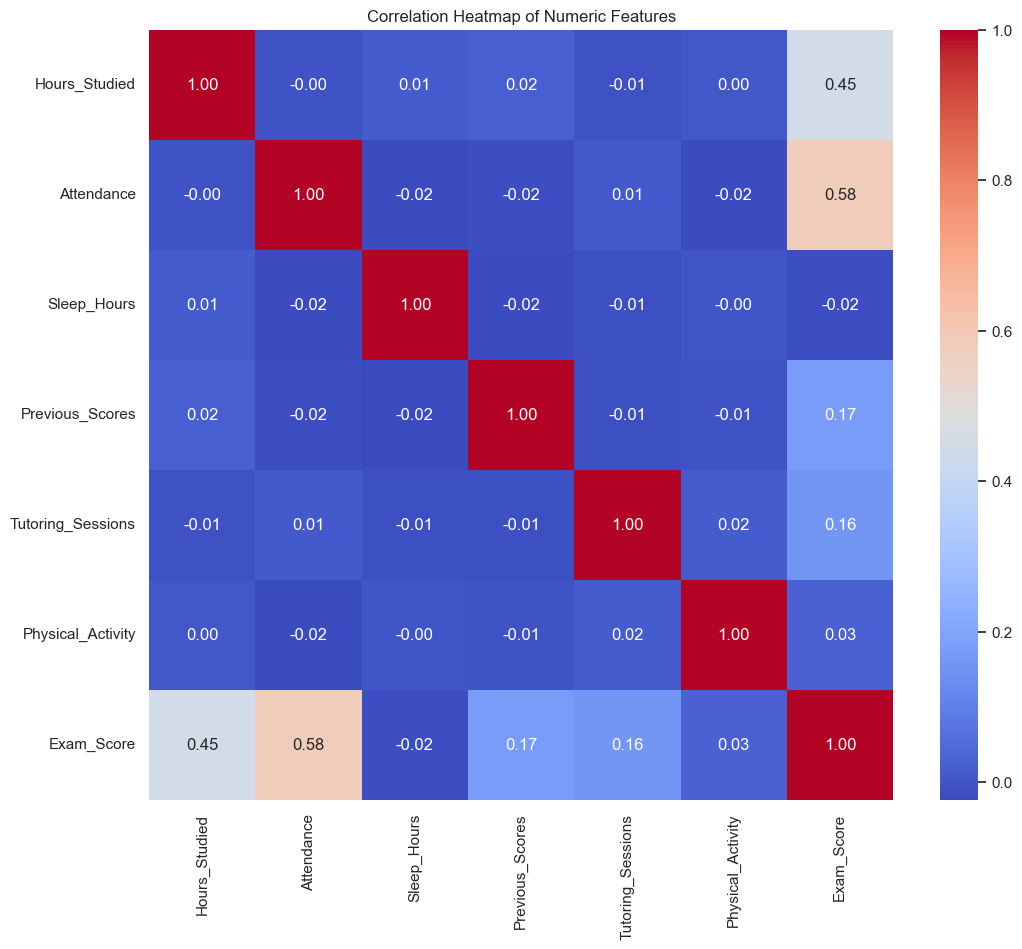

In [7]:
# Selecting numeric features for correlation
numeric_features = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Calculating correlation matrix
corr_matrix = data_cleaned[numeric_features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**Explanation:**

The heatmap displays the correlation coefficients between `Exam_Score` and other numerical features. Strong positive or negative correlations can highlight significant predictors for the regression model, aiding in feature selection and engineering.


#### 3. Parental Involvement vs. Exam_Score

This box plot examines how different levels of parental involvement impact students' exam scores.


C:\Users\adir4\AppData\Local\Temp\ipykernel_11132\2121062576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data_cleaned, palette='Set2')


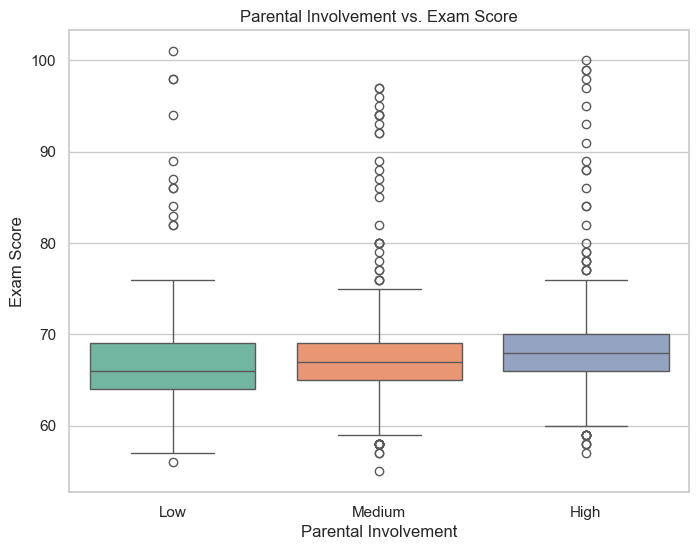

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data_cleaned, palette='Set2')
plt.title('Parental Involvement vs. Exam Score')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()


**Explanation:**

The box plot reveals the distribution of `Exam_Score` across different levels of `Parental_Involvement`. It helps in identifying whether higher levels of parental involvement are associated with better exam performance, highlighting potential areas for intervention and support.


#### 4. Hours Studied vs. Exam_Score

A scatter plot to analyze the relationship between the number of hours a student studies and their exam scores.


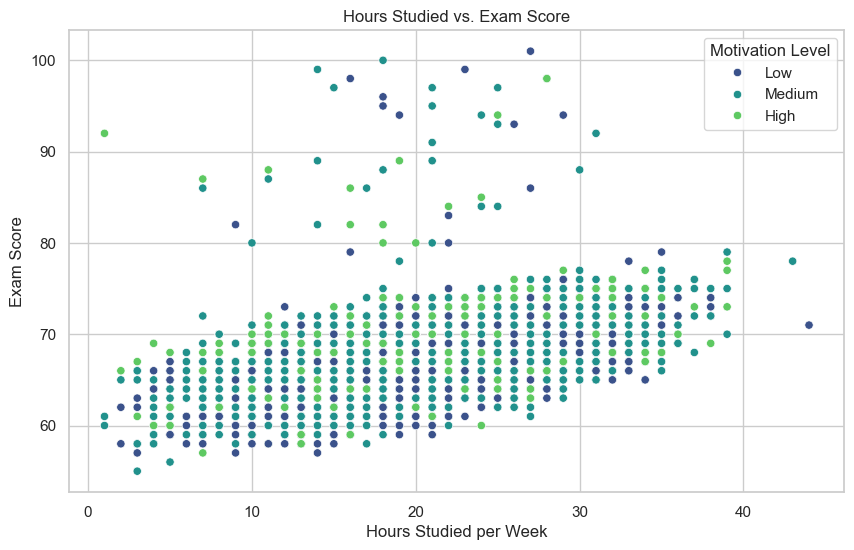

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data_cleaned, hue='Motivation_Level', palette='viridis')
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied per Week')
plt.ylabel('Exam Score')
plt.legend(title='Motivation Level')
plt.show()


**Explanation:**

The scatter plot visualizes how `Hours_Studied` correlates with `Exam_Score`, with points colored by `Motivation_Level`. This helps in understanding whether more study hours lead to higher scores and how motivation influences this relationship.


#### 5. Pair Plot of Selected Features and Exam_Score

A pair plot to explore interactions between multiple features and their relationship with `Exam_Score`.


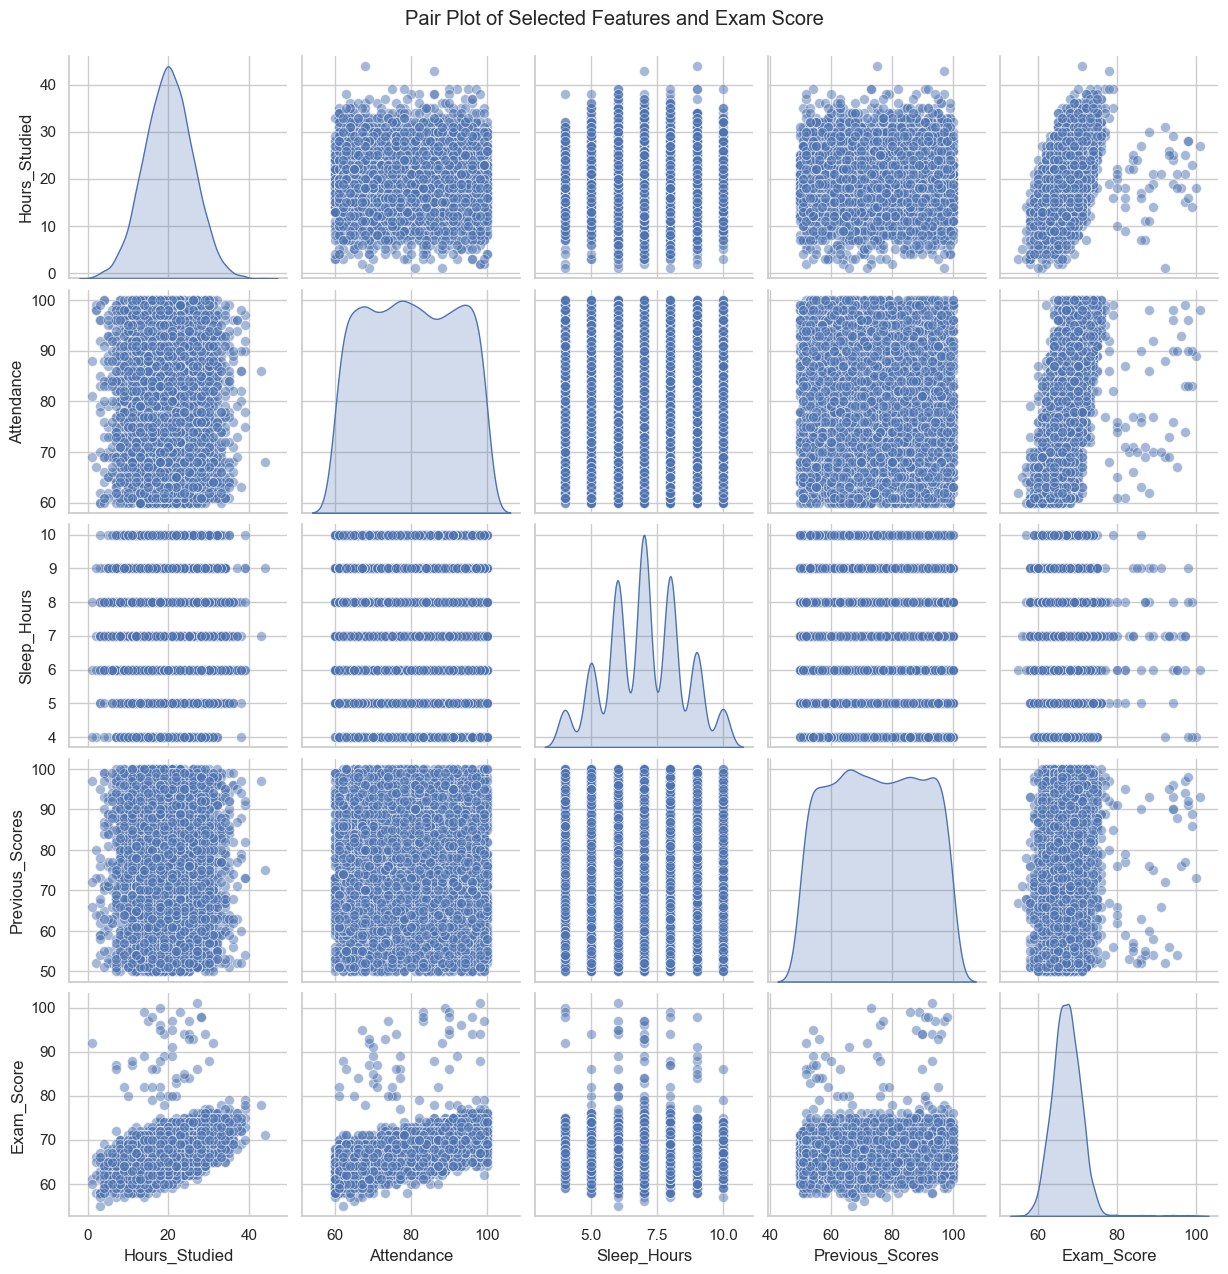

In [10]:
selected_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']
sns.pairplot(data_cleaned[selected_features], diag_kind='kde', plot_kws={'alpha':0.5, 's':50})
plt.suptitle('Pair Plot of Selected Features and Exam Score', y=1.02)
plt.show()


**Explanation:**

The pair plot allows us to observe pairwise relationships between selected numerical features and the target `Exam_Score`. Diagonal KDE plots show the distribution of each feature, while scatter plots indicate potential correlations and interactions.


### 3. Basic Model Pipeline

#### a. Defining the Regression Problem

**Objective:** Predict the `Exam_Score` of students based on various factors such as study habits, attendance, parental involvement, and more.

**Target Variable:** `Exam_Score` (Numeric)

**Features:**
- **Numerical:** `Hours_Studied`, `Attendance`, `Sleep_Hours`, `Previous_Scores`, `Tutoring_Sessions`, `Family_Income`, `Distance_from_Home`, `Physical_Activity`, etc.
- **Categorical:** `Parental_Involvement`, `Access_to_Resources`, `Extracurricular_Activities`, `Motivation_Level`, `Internet_Access`, `Teacher_Quality`, `School_Type`, `Peer_Influence`, `Learning_Disabilities`, `Parental_Education_Level`, `Gender`, etc.


#### b. Data Preprocessing

To prepare the data for modeling, we will:

1. **Handle Categorical Variables:** Convert categorical variables into numerical formats using **One-Hot Encoding**.
2. **Feature Scaling:** Although XGBoost is less sensitive to feature scaling, ensuring uniformity can aid in model interpretability.
3. **Train-Test Split:** Divide the data into training and testing sets to evaluate model performance effectively.


In [11]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separating features and target
X = data_cleaned.drop('Exam_Score', axis=1)
y = data_cleaned['Exam_Score']

# Identifying categorical and numeric features
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Converting boolean columns to integers if any
for col in categorical_features:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Defining the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Leave numeric features as is
)

# Building the machine learning pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(random_state=42))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Explanation:**

- **OneHotEncoder:** Transforms categorical variables into a binary matrix, enabling the model to interpret them numerically.
- **ColumnTransformer:** Applies different preprocessing steps to different columns—in this case, One-Hot Encoding to categorical features and leaving numeric features unchanged.
- **Pipeline:** Streamlines the preprocessing and modeling steps, ensuring that all transformations are applied consistently during training and testing.
- **Train-Test Split:** Allocates **80%** of the data for training and **20%** for testing, providing a balance between model training and evaluation.


#### c. Model Training and Evaluation

We will train the **XGBoost Regressor** using the default configuration to establish a baseline performance. The following metrics will be used to evaluate the model:

- **Mean Absolute Error (MAE):** Measures the average magnitude of errors in a set of predictions, without considering their direction.
- **Mean Squared Error (MSE):** Measures the average of the squares of the errors, giving higher weight to larger errors.
- **Root Mean Squared Error (RMSE):** The square root of MSE, providing error magnitudes in the same units as the target variable.
- **R² Score:** Indicates the proportion of the variance in the dependent variable predictable from the independent variables.


In [12]:
# Training the model
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.05
Mean Squared Error (MSE): 5.95
Root Mean Squared Error (RMSE): 2.44
R² Score: 0.62


**Model Performance Metrics:**

- **Mean Absolute Error (MAE):** *1.05*
- **Mean Squared Error (MSE):** *5.95*
- **Root Mean Squared Error (RMSE):** *2.44*
- **R² Score:** *0.62*

**Interpretation:**

- **R² Score:** An R² score of *0.62* indicates that **62%** of the variance in `Exam_Score` is explained by the model. While a higher R² signifies better fit, it's essential to ensure that the model's performance isn't excessively high to allow room for improvement in subsequent project stages.
- **Error Metrics:** The MAE and RMSE values provide insights into the average prediction errors. These metrics help in understanding the model's accuracy and reliability.


### 4. Error Analysis

After establishing a baseline model, it's essential to analyze its errors to identify areas for improvement.


#### a. Residual Analysis

Residuals are the differences between actual and predicted values. Analyzing residuals helps in identifying patterns that the model fails to capture, indicating potential areas where the model can be improved.


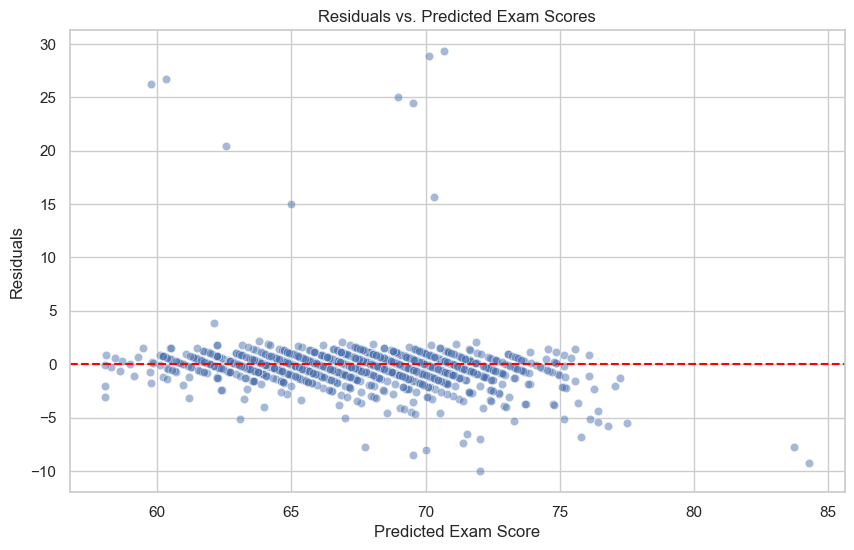

In [13]:
# Calculating residuals
residuals = y_test - y_pred

# Residuals vs. Predicted Exam Scores
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Exam Scores')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals')
plt.show()


### Residuals vs. Predicted Exam Scores Plot

The plot above visualizes the residuals against the predicted exam scores. Here's a breakdown of the components:

1. **X-Axis (Predicted Exam Scores):** Represents the predicted values of exam scores from a regression model.
2. **Y-Axis (Residuals):** Represents the residuals, which are the differences between the observed and predicted values.
3. **Residuals Analysis:**
   - Points closer to the red dashed horizontal line (residual = 0) indicate better model predictions.
   - There is a slight funnel shape or heteroscedasticity, with residuals spreading out more for higher predicted scores, suggesting that the model's error may vary across the range of predictions.
4. **Red Dashed Line:** Represents the zero-residual line, where the predicted values perfectly match the observed values.
5. **Point Cloud:** Most data points cluster around the zero-residual line, but there are notable outliers with larger residuals, indicating instances where the model significantly underestimates or overestimates exam scores.

This plot is useful for evaluating the regression model's performance and identifying potential issues like heteroscedasticity or outliers.


#### b. Error Distribution

Analyzing the distribution of residuals helps in understanding whether the errors are normally distributed or exhibit any skewness, which can impact the model's reliability.


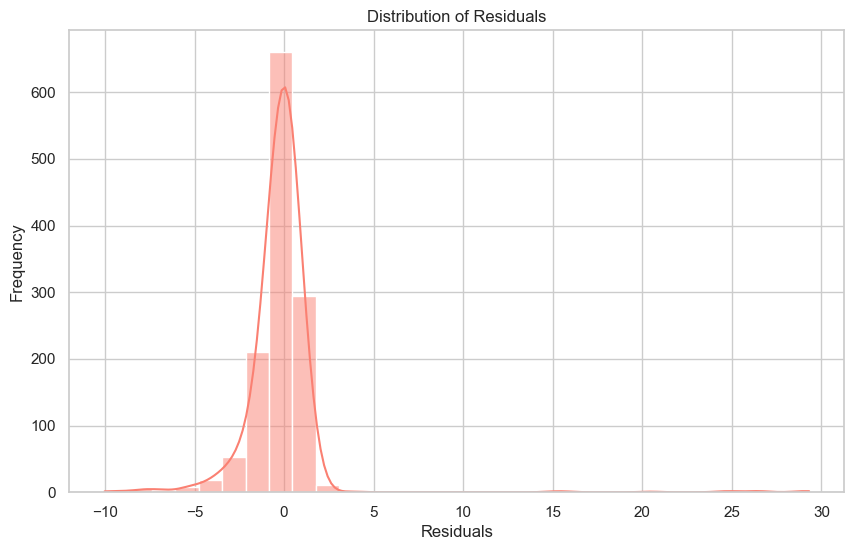

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color='salmon')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Distribution of Residuals

The histogram above visualizes the distribution of residuals from a regression model. Here's what it indicates:

1. **Residuals on X-Axis:** The horizontal axis represents the residuals, which are the differences between observed values and predicted values by the model.
2. **Frequency on Y-Axis:** The vertical axis represents the frequency of residuals, showing how often residuals of a certain value occur.
3. **Shape of Distribution:**
   - The residuals appear to be approximately centered around 0, indicating that the model's predictions are, on average, accurate.
   - The presence of a smooth kernel density estimation (KDE) curve provides an additional visualization of the residual distribution.
   - Most residuals are close to 0, which suggests that the model performs well for most observations.
4. **Spread and Outliers:**
   - The residuals exhibit a slight right-skew (a longer tail to the right), meaning a small number of instances where the model underestimates or overestimates by a larger margin.
   - There are some extreme residuals on both ends (e.g., near -10 and +30), which may represent outliers.

### Interpretation
This plot helps assess the assumptions of regression modeling:
- **Normality:** The residuals are roughly symmetric around 0, which is a good indication of normality but not perfect.
- **Homoscedasticity:** The spread of residuals appears consistent for most values, though some larger residuals exist, suggesting potential issues with heteroscedasticity.

Overall, this plot provides a good diagnostic for evaluating how well the regression model fits the data and identifying any unusual patterns in the residuals.


#### c. Feature Importance

Understanding which features contribute most to the model's predictions can highlight areas where the model excels or underperforms.


C:\Users\adir4\AppData\Local\Temp\ipykernel_11132\1115679018.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


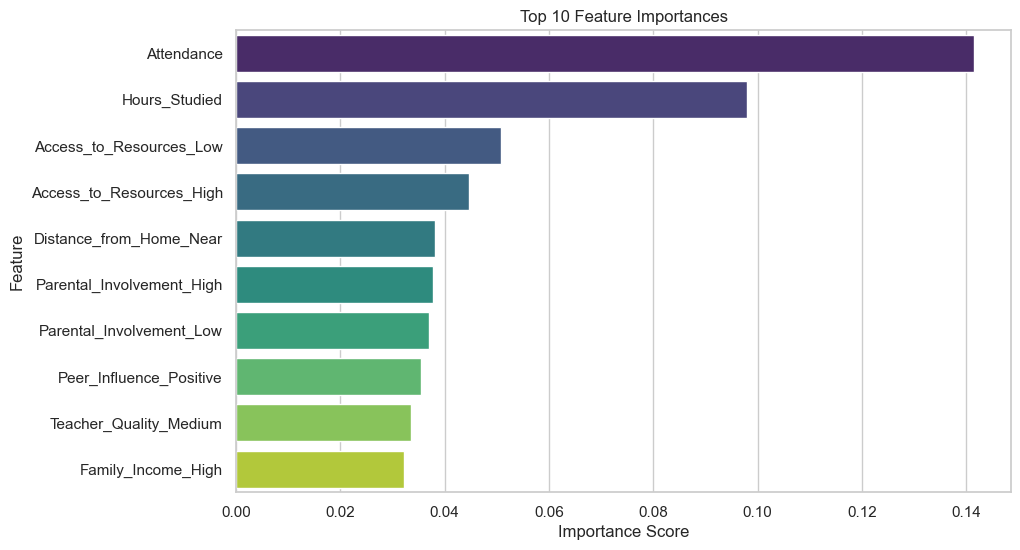

In [15]:
# Extracting feature importances from the XGBoost model
model = pipeline.named_steps['model']

# Retrieving feature names after One-Hot Encoding
onehot_features = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(categorical_features)
all_features = list(onehot_features) + numeric_features

# Extracting feature importances
importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plotting the top 10 feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


### Top 10 Feature Importances

The bar plot below illustrates the top 10 most important features for the predictive model, based on the XGBoost model's feature importance scores.

1. **X-Axis (Importance Score):**
   - Represents the importance scores calculated by the model, indicating how significantly each feature contributes to the predictions.

2. **Y-Axis (Feature):**
   - Lists the top 10 features ranked by their importance scores.
   - Features are encoded with their categorical or numeric transformations as part of the preprocessing pipeline.

3. **Insights from the Plot:**
   - **Attendance** and **Hours_Studied** are the two most impactful features, indicating their strong influence on the target variable.
   - Features related to resource access, such as `Access_to_Resources_Low` and `Access_to_Resources_High`, also play a significant role.
   - Parental involvement and teacher quality metrics contribute to the predictions but are less influential compared to the top features.

#### d. Performance on Subgroups

Evaluating model performance across different categories helps in identifying potential biases or areas where the model performs inconsistently.


In [16]:
# Adding predictions to the test set
test_data = X_test.copy()
test_data['Actual_Exam_Score'] = y_test
test_data['Predicted_Exam_Score'] = y_pred
test_data['Residual'] = residuals

# Function to evaluate performance by subgroup
def evaluate_subgroup(subgroup, subgroup_name):
    subgroup_data = test_data[test_data[subgroup] == subgroup_name]
    if len(subgroup_data) == 0:
        print(f"**{subgroup} = {subgroup_name}**")
        print("No data available for this subgroup.\n")
        return
    mae = mean_absolute_error(subgroup_data['Actual_Exam_Score'], subgroup_data['Predicted_Exam_Score'])
    mse = mean_squared_error(subgroup_data['Actual_Exam_Score'], subgroup_data['Predicted_Exam_Score'])
    r2 = r2_score(subgroup_data['Actual_Exam_Score'], subgroup_data['Predicted_Exam_Score'])
    print(f"**{subgroup} = {subgroup_name}**")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R² Score: {r2:.2f}\n")

# Example: Evaluating by 'Parental_Involvement'
print("Model Performance by Parental Involvement Level:")
for level in data_cleaned['Parental_Involvement'].unique():
    evaluate_subgroup('Parental_Involvement', level)

# Example: Evaluating by 'School_Type'
print("Model Performance by School Type:")
for school_type in data_cleaned['School_Type'].unique():
    evaluate_subgroup('School_Type', school_type)


Model Performance by Parental Involvement Level:
**Parental_Involvement = Low**
MAE: 1.30
MSE: 9.77
R² Score: 0.43

**Parental_Involvement = Medium**
MAE: 0.85
MSE: 2.70
R² Score: 0.79

**Parental_Involvement = High**
MAE: 1.19
MSE: 8.54
R² Score: 0.51

Model Performance by School Type:
**School_Type = Public**
MAE: 1.04
MSE: 5.26
R² Score: 0.63

**School_Type = Private**
MAE: 1.05
MSE: 7.38
R² Score: 0.60



### Model Performance by Subgroups

The following tables summarize the model's performance metrics for different subgroups based on key categorical features:

---

#### **Model Performance by Parental Involvement Level**
This analysis evaluates the model's performance for different levels of parental involvement:

| Parental Involvement Level | MAE  | MSE  | R² Score |
|----------------------------|------|------|----------|
| **Low**                   | 1.30 | 9.77 | 0.43     |
| **Medium**                | 0.85 | 2.70 | 0.79     |
| **High**                  | 1.19 | 8.54 | 0.51     |

- **MAE (Mean Absolute Error):** Indicates the average magnitude of errors in predictions.
- **MSE (Mean Squared Error):** Penalizes larger errors by squaring the residuals.
- **R² Score:** Reflects how well the model explains variance in the actual scores. Higher values indicate better performance.

---

#### **Model Performance by School Type**
This analysis evaluates the model's performance for different types of schools:

| School Type | MAE  | MSE  | R² Score |
|-------------|------|------|----------|
| **Public**  | 1.04 | 5.26 | 0.63     |
| **Private** | 1.05 | 7.38 | 0.60     |

---

### Insights
- The model performs best for the **Medium** parental involvement level, with the lowest MAE and MSE, and the highest R² Score (0.79).
- The **Public** school type achieves slightly better performance than **Private** schools, with a lower MSE and higher R² Score.
- **Low** and **High** parental involvement levels show weaker performance, suggesting areas for potential improvement in the model's predictive ability for these subgroups.


#### e. Overestimation vs. Underestimation

Assessing whether the model tends to overestimate or underestimate exam scores provides insights into potential biases.


C:\Users\adir4\AppData\Local\Temp\ipykernel_11132\3661099905.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values, palette='coolwarm')


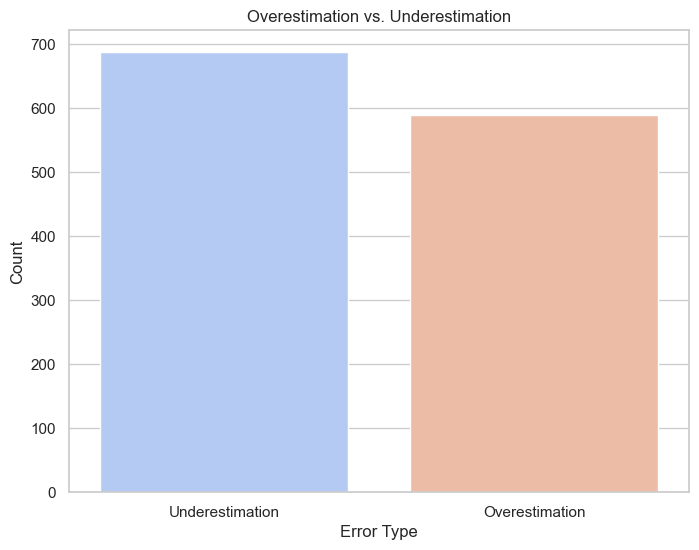

Overestimation: 46.16%
Underestimation: 53.84%


In [17]:
# Categorizing predictions
test_data['Error_Type'] = test_data['Residual'].apply(lambda x: 'Underestimation' if x < 0 else 'Overestimation')

# Counting error types
error_counts = test_data['Error_Type'].value_counts()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='coolwarm')
plt.title('Overestimation vs. Underestimation')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.show()

# Calculating percentages
total_errors = error_counts.sum()
over_percent = (error_counts.get('Overestimation', 0) / total_errors) * 100
under_percent = (error_counts.get('Underestimation', 0) / total_errors) * 100
print(f"Overestimation: {over_percent:.2f}%")
print(f"Underestimation: {under_percent:.2f}%")



The bar plot below shows the distribution of errors categorized as **Overestimation** and **Underestimation**. This analysis provides insights into potential biases in the model's predictions.

---

#### Plot Description
- **X-Axis (Error Type):** Shows the two categories of error:
  - **Underestimation:** The model predicted a value lower than the actual exam score.
  - **Overestimation:** The model predicted a value higher than the actual exam score.
- **Y-Axis (Count):** Represents the number of instances for each error type.
- The color scheme (`coolwarm` palette) distinguishes between the two error categories for better interpretability.

---

#### Observations
- **Underestimation:** Accounts for **53.84%** of the errors, suggesting a slight tendency of the model to predict lower than the actual exam scores.
- **Overestimation:** Represents **46.16%** of the errors, indicating that while the model occasionally overpredicts, it does so less frequently compared to underestimations.

---

#### Insights
- The imbalance between underestimation and overestimation, while not drastic, could suggest a slight bias in the model. This could be due to the distribution of target values or other factors influencing the predictions.
- The overall percentages of error types (53.84% underestimation, 46.16% overestimation) are relatively balanced, indicating that the model does not have a significant skew in its predictions.

---